In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVR
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeRegressor

# Reading Data

In [2]:
df = pd.read_csv('WeatherPredictionDataset.csv')
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251,15.8263,0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259,15.8263,0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204,14.9569,0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269,15.8263,0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259,15.8263,0,1016.51,Partly cloudy throughout the day.


In [3]:
df.columns

Index(['Formatted Date', 'Summary', 'Precip Type', 'Temperature (C)',
       'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Loud Cover',
       'Pressure (millibars)', 'Daily Summary'],
      dtype='object')

# Dealing with null values

In [4]:
df.isnull().sum()

Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64

In [5]:
df = df.dropna()
df.isnull().sum()

Formatted Date              0
Summary                     0
Precip Type                 0
Temperature (C)             0
Apparent Temperature (C)    0
Humidity                    0
Wind Speed (km/h)           0
Wind Bearing (degrees)      0
Visibility (km)             0
Loud Cover                  0
Pressure (millibars)        0
Daily Summary               0
dtype: int64

# Simple Analysis with few columns

In [6]:
x_column = ['Temperature (C)','Wind Speed (km/h)','Visibility (km)','Wind Bearing (degrees)','Pressure (millibars)']
y_column = ['Humidity']
X = df[x_column]
y = df[y_column]

In [7]:
X.head()

,Temperature (C),Wind Speed (km/h),Visibility (km),Wind Bearing (degrees),Pressure (millibars)
0,9.472222,14.1197,15.8263,251,1015.13
1,9.355556,14.2646,15.8263,259,1015.63
2,9.377778,3.9284,14.9569,204,1015.94
3,8.288889,14.1036,15.8263,269,1016.41
4,8.755556,11.0446,15.8263,259,1016.51


In [8]:
y.head()

,Humidity
0,0.89
1,0.86
2,0.89
3,0.83
4,0.83


In [9]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95936 entries, 0 to 96452
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Temperature (C)         95936 non-null  float64
 1   Wind Speed (km/h)       95936 non-null  float64
 2   Visibility (km)         95936 non-null  float64
 3   Wind Bearing (degrees)  95936 non-null  int64  
 4   Pressure (millibars)    95936 non-null  float64
dtypes: float64(4), int64(1)
memory usage: 4.4 MB


In [10]:
y.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95936 entries, 0 to 96452
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Humidity  95936 non-null  float64
dtypes: float64(1)
memory usage: 1.5 MB


In [11]:
X.describe()

,Temperature (C),Wind Speed (km/h),Visibility (km),Wind Bearing (degrees),Pressure (millibars)
count,95936.000000,95936.000000,95936.000000,95936.000000,95936.000000
mean,11.940976,10.804936,10.362402,187.518773,1003.150038
std,9.570671,6.920727,4.173780,107.385351,117.276976
min,-21.822222,0.000000,0.000000,0.000000,0.000000
25%,4.604167,5.796000,8.372000,116.000000,1011.890000
50%,12.033333,9.933700,10.046400,180.000000,1016.420000
75%,18.844444,14.135800,14.812000,290.000000,1021.050000
max,39.905556,63.852600,16.100000,359.000000,1046.380000


In [12]:
y.describe()

,Humidity
count,95936.000000
mean,0.734841
std,0.195724
min,0.000000
25%,0.600000
50%,0.780000
75%,0.890000
max,1.000000


In [13]:
# # Encoding code
# cleanup_nums = {"Precip Type":{"rain": 0, "snow": 1}}
# # rain = 0 and snow = 1
# df = df.replace(cleanup_nums)
# df.head() 

In [14]:
X_y_combined = pd.concat([X, y], axis=1, join='inner')
X_y_combined

,Temperature (C),Wind Speed (km/h),Visibility (km),Wind Bearing (degrees),Pressure (millibars),Humidity
0,9.472222,14.1197,15.8263,251,1015.13,0.89
1,9.355556,14.2646,15.8263,259,1015.63,0.86
2,9.377778,3.9284,14.9569,204,1015.94,0.89
3,8.288889,14.1036,15.8263,269,1016.41,0.83
4,8.755556,11.0446,15.8263,259,1016.51,0.83
...,...,...,...,...,...,...
96448,26.016667,10.9963,16.1000,31,1014.36,0.43
96449,24.583333,10.0947,15.5526,20,1015.16,0.48
96450,22.038889,8.9838,16.1000,30,1015.66,0.56
96451,21.522222,10.5294,16.1000,20,1015.95,0.60


In [15]:
X_y_combined.corr()

,Temperature (C),Wind Speed (km/h),Visibility (km),Wind Bearing (degrees),Pressure (millibars),Humidity
Temperature (C),1.000000,0.008304,0.393719,0.029937,-0.005253,-0.632148
Wind Speed (km/h),0.008304,1.000000,0.100801,0.104366,-0.049453,-0.224569
Visibility (km),0.393719,0.100801,1.000000,0.048900,0.061011,-0.370511
Wind Bearing (degrees),0.029937,0.104366,0.048900,1.000000,-0.011629,0.000814
Pressure (millibars),-0.005253,-0.049453,0.061011,-0.011629,1.000000,0.005375
Humidity,-0.632148,-0.224569,-0.370511,0.000814,0.005375,1.000000


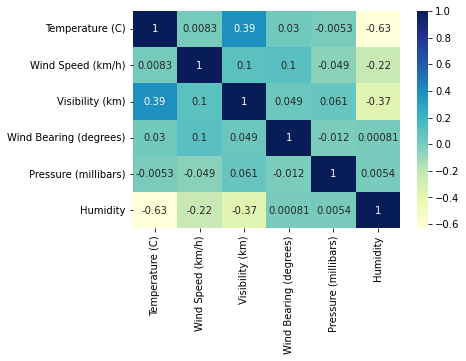

In [16]:
dataplot = sns.heatmap(X_y_combined.corr(), cmap="YlGnBu", annot=True)
plt.show()

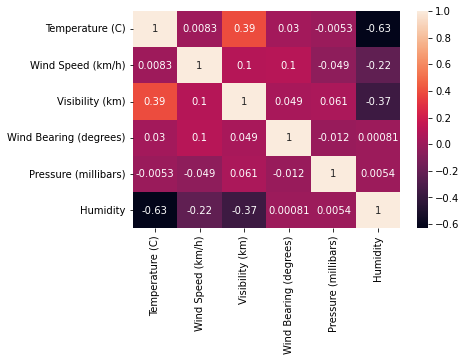

In [18]:
dataplot=sns.heatmap(X_y_combined.corr(),annot=True)
plt.show()

#### Wind Bearing and Preassure has very little correlation with Humidity. So we will do two analysis one with Wind Bearning and Preassure and one without it and see what works best

# abcd

In [19]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)

In [21]:
len(X_train)

71952

In [22]:
len(X_test)

23984

In [23]:
len(X_test) / len(X)

0.25

In [24]:
standard_scaler = preprocessing.StandardScaler()
X_train_standard_scaler = standard_scaler.fit_transform(X_train)

In [25]:
X_train_standard_scaler

array([[ 0.4336569 ,  0.53683241,  0.21908719,  1.41801637,  0.10349202],
       [ 0.54980685, -0.96356571, -2.26628097, -0.05368658,  0.07608878],
       [ 0.33841394,  0.19435023, -0.08917553,  0.76599607,  0.09449901],
       ...,
       [-0.54432571, -0.01067312,  1.06680967, -0.351753  ,  0.08397888],
       [ 0.75248852, -1.44816635, -0.08917553, -0.6218757 ,  0.08007625],
       [-0.72784264,  0.00563556,  0.89341189,  0.32821102,  0.10586753]])

# Simple Linear Regression Model

In [26]:
model_linear= LinearRegression()

In [27]:
model_linear.fit(X_train_standard_scaler, y_train)

LinearRegression()

In [28]:
X_test_scaled = standard_scaler.fit_transform(X_test)
y_pred = model_linear.predict(X_test_scaled)

In [29]:
y_pred

array([[0.88911031],
       [0.54439137],
       [0.68285218],
       ...,
       [0.64310514],
       [0.81916752],
       [0.68253365]])

In [30]:
y_test

,Humidity
55053,0.92
27411,0.73
36004,0.97
69310,0.82
15875,0.60
...,...
96252,0.39
49816,0.35
75965,0.71
11129,0.70


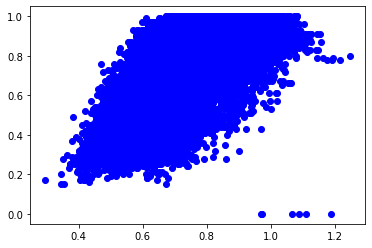

In [31]:
plt.scatter(y_pred, y_test, color ='b')
plt.show()

In [32]:
import math  
import sklearn.metrics    
mse = sklearn.metrics.mean_squared_error(y_pred, y_test)  
  
rmse = math.sqrt(mse)  
  
print("The difference between actual and predicted values", rmse)  

The difference between actual and predicted values 0.1434227909507746


# With Modified X - Removing uncorrelated variables 

In [33]:
X_modified = X[['Temperature (C)','Wind Speed (km/h)', 'Visibility (km)']]
X_modified.head()

,Temperature (C),Wind Speed (km/h),Visibility (km)
0,9.472222,14.1197,15.8263
1,9.355556,14.2646,15.8263
2,9.377778,3.9284,14.9569
3,8.288889,14.1036,15.8263
4,8.755556,11.0446,15.8263


In [34]:
X_train, X_test, y_train, y_test = train_test_split(X_modified, y, test_size = 0.25, random_state=42)

In [35]:
X_train

,Temperature (C),Wind Speed (km/h),Visibility (km)
31020,16.111111,14.4900,11.2700
47983,17.222222,4.1216,0.8855
69569,15.200000,12.1233,9.9820
67369,12.333333,2.9463,11.6886
32396,22.222222,11.2700,11.2700
...,...,...,...
6265,14.511111,5.1198,14.5866
54964,-11.877778,10.7387,3.5742
76963,6.755556,10.7065,14.8120
860,19.161111,0.7728,9.9820


In [36]:
standard_scaler = preprocessing.StandardScaler()
X_train_modified_standard_scaled = standard_scaler.fit_transform(X_train)

In [37]:
X_train_modified_standard_scaled

array([[ 0.4336569 ,  0.53683241,  0.21908719],
       [ 0.54980685, -0.96356571, -2.26628097],
       [ 0.33841394,  0.19435023, -0.08917553],
       ...,
       [-0.54432571, -0.01067312,  1.06680967],
       [ 0.75248852, -1.44816635, -0.08917553],
       [-0.72784264,  0.00563556,  0.89341189]])

In [38]:
model_linear_1 = LinearRegression()
model_linear_1.fit(X_train_modified_standard_scaled, y_train)

LinearRegression()

In [39]:
X_test

,Temperature (C),Wind Speed (km/h),Visibility (km)
55053,-0.555556,11.2700,8.0500
27411,21.111111,20.9300,16.1000
36004,16.600000,5.9731,14.9086
69310,1.600000,3.2200,16.1000
15875,2.194444,10.8836,9.9820
...,...,...,...
96252,24.972222,13.7977,16.1000
49816,23.988889,3.4132,10.3523
75965,7.761111,26.8387,15.8263
11129,8.977778,3.1878,11.2056


In [40]:
X_test_modified_scaled = standard_scaler.fit_transform(X_test)
y_pred_modified = model_linear_1.predict(X_test_modified_scaled)

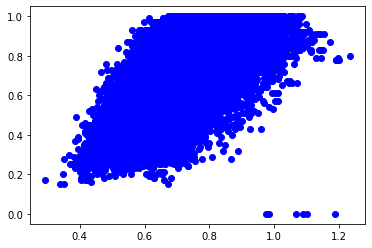

In [41]:
plt.scatter(y_pred_modified, y_test, color ='b')
plt.show()

#### We haven't removed outliers yet

In [42]:
mse = sklearn.metrics.mean_squared_error(y_pred_modified, y_test)  
  
rmse = math.sqrt(mse)  
  
print("The difference between actual and predicted values", rmse)  

The difference between actual and predicted values 0.1436148414659298


# Polynomial Regression 

In [43]:
from sklearn.preprocessing import PolynomialFeatures

In [44]:
poly = PolynomialFeatures(degree=2, include_bias=False)

In [45]:
poly_features = poly.fit_transform(X_modified)

In [46]:
poly_features[0]

array([  9.47222222,  14.1197    ,  15.8263    ,  89.72299382,
       133.74493611, 149.91023055, 199.36592809, 223.46260811,
       250.47177169])

In [47]:
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size = 0.25, random_state=42)

In [48]:
standard_scaler = preprocessing.StandardScaler()
X_train_modified_standard_scaled_poly = standard_scaler.fit_transform(X_train)

In [49]:
poly_reg_model = LinearRegression()
poly_reg_model.fit(X_train_modified_standard_scaled_poly, y_train)

LinearRegression()

In [50]:
X_test_modified_standard_scaled_poly = standard_scaler.fit_transform(X_test)
y_pred_modified_poly = poly_reg_model.predict(X_test_modified_standard_scaled_poly)

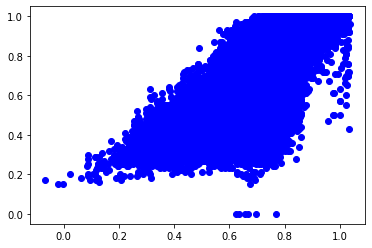

In [51]:
plt.scatter(y_pred_modified_poly, y_test, color ='b')
plt.show()

In [52]:
mse = sklearn.metrics.mean_squared_error(y_pred_modified_poly, y_test)  
  
rmse = math.sqrt(mse)  
  
print("The difference between actual and predicted values", rmse)  

The difference between actual and predicted values 0.12809563381083316


####  Imporvement 

# Decision Tree

In [53]:
X

,Temperature (C),Wind Speed (km/h),Visibility (km),Wind Bearing (degrees),Pressure (millibars)
0,9.472222,14.1197,15.8263,251,1015.13
1,9.355556,14.2646,15.8263,259,1015.63
2,9.377778,3.9284,14.9569,204,1015.94
3,8.288889,14.1036,15.8263,269,1016.41
4,8.755556,11.0446,15.8263,259,1016.51
...,...,...,...,...,...
96448,26.016667,10.9963,16.1000,31,1014.36
96449,24.583333,10.0947,15.5526,20,1015.16
96450,22.038889,8.9838,16.1000,30,1015.66
96451,21.522222,10.5294,16.1000,20,1015.95


In [54]:
y

,Humidity
0,0.89
1,0.86
2,0.89
3,0.83
4,0.83
...,...
96448,0.43
96449,0.48
96450,0.56
96451,0.60


In [55]:
dtree= DecisionTreeRegressor()

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)

In [57]:
dtree.fit(X_train, y_train)

DecisionTreeRegressor()

In [58]:
Y_pred_dtree = dtree.predict(X_test)

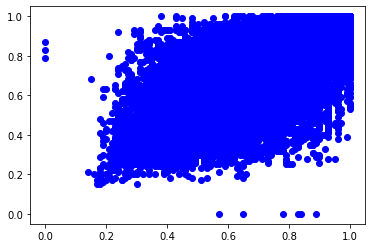

In [59]:
plt.scatter(Y_pred_dtree, y_test, color ='b')
plt.show()

In [60]:
mse = sklearn.metrics.mean_squared_error(Y_pred_dtree, y_test)  
  
rmse = math.sqrt(mse)  
  
print("The difference between actual and predicted values", rmse)  

The difference between actual and predicted values 0.14232292624599693


# Random Forest

In [61]:
from sklearn.ensemble import RandomForestRegressor
random_forest_1 = RandomForestRegressor(n_estimators = 100, random_state = 0)
  
# fit the regressor with x and y data
random_forest_1.fit(X_train, y_train) 

C:\Users\PIYUSH~1\AppData\Local\Temp/ipykernel_27104/1798616019.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random_forest_1.fit(X_train, y_train)


RandomForestRegressor(random_state=0)

In [62]:
Y_pred_random_forest_1 = random_forest_1.predict(X_test)

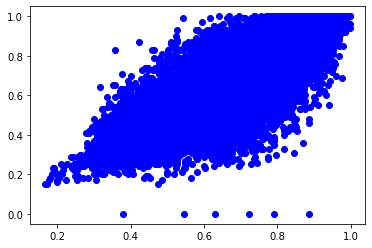

In [63]:
plt.scatter(Y_pred_random_forest_1, y_test, color ='b')
plt.show()

In [64]:
mse = sklearn.metrics.mean_squared_error(Y_pred_random_forest_1, y_test)  
  
rmse = math.sqrt(mse)  
  
print("The difference between actual and predicted values", rmse)  

The difference between actual and predicted values 0.10232231867714096


# SVM

In [65]:
svm_model_1 = SVR()
svm_model_1.fit(X_train, y_train)

D:\anocanda\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [66]:
y_pred_svm_model_1 = svm_model_1.predict(X_test)

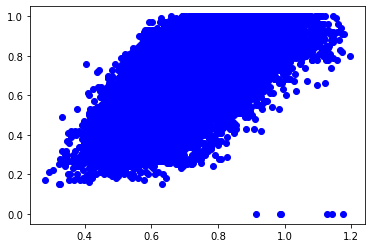

In [67]:
plt.scatter(y_pred_svm_model_1, y_test, color ='b')
plt.show()

In [68]:
mse = sklearn.metrics.mean_squared_error(y_pred_svm_model_1, y_test)  
  
rmse = math.sqrt(mse)  
  
print("The difference between actual and predicted values", rmse)  

The difference between actual and predicted values 0.1357414519054907
